# Wave Equation Demo

In [1]:
using WaveEquation
using Plots
using Printf

Create some gaussian wave packet initial conditions with zero initial time derivative and set the discretization resolution

In [2]:
g0(x) = exp(-400*(x-0.7)^2)
dgdt0(x) = 0.0
resolution = 500
initialstate = [discretize(g0, resolution), discretize(dgdt0, resolution)];

Run the simulation with specified time step and number of steps

In [3]:
dt = 0.0001
n = 25000
result = solve(waveEQ, initialstate, dt, n);

Plot the final result:

In [4]:
xs = range(0, 1; length=1001);
plotresult(xs, result, i) = plot(xs, [evaluate(result[i][1], x) for x in xs], 
    label="", 
    lw=2, 
    xlabel="x", 
    ylabel="A", 
    title=@sprintf("t = %.2f",(i-1)*dt),
    ylim=[-1,1]
)

plotresult (generic function with 1 method)

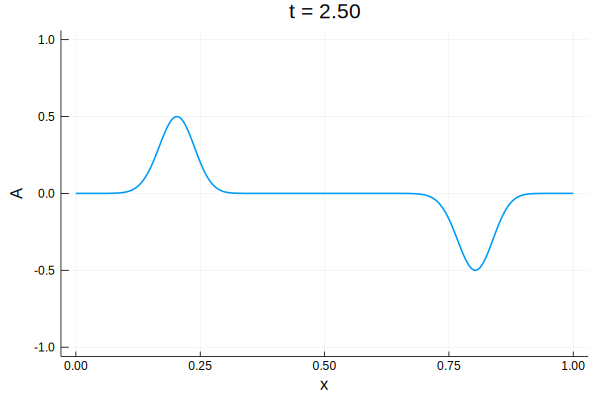

In [5]:
plotresult(xs, result, n)

Create an animation from the results

In [6]:
anim = @animate for i=1:70:n+1
    plotresult(xs, result, i)
end

Animation("C:\\Users\\Ian\\AppData\\Local\\Temp\\jl_dpHkZO", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000349.png", "000350.png", "000351.png", "000352.png", "000353.png", "000354.png", "000355.png", "000356.png", "000357.png", "000358.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\Ian\Desktop\Computational Physics\WaveEquation\src\tmp.gif
└ @ Plots C:\Users\Ian\.julia\packages\Plots\WwFyB\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\Ian\\Desktop\\Computational Physics\\WaveEquation\\src\\tmp.gif")
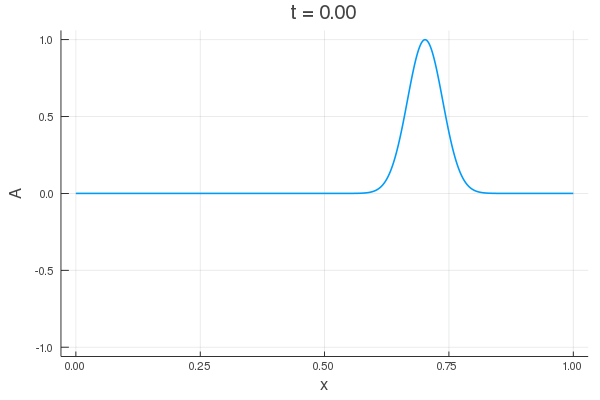

In [7]:
gif(anim, fps=30)

Check that total energy is conserved

In [8]:
potential_energy = [quad_integrate(ddx(result[i][1])^2) for i in 1:n+1];
kinetic_energy = [quad_integrate(result[i][2]^2) for i in 1:n+1];

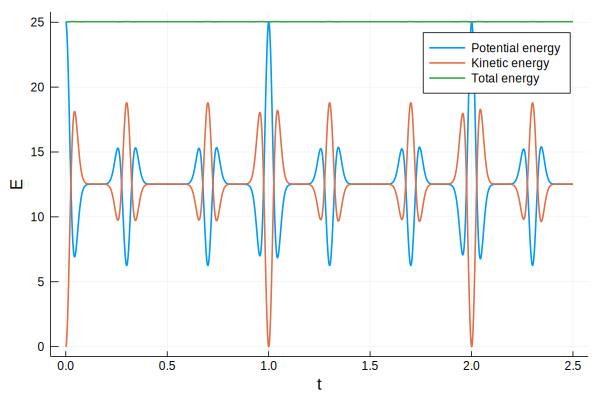

In [9]:
plot(dt*(1:n+1), [potential_energy, kinetic_energy, potential_energy+kinetic_energy], xlabel="t", ylabel="E", 
    lab=["Potential energy" "Kinetic energy" "Total energy"], lw=2)